# Convolutional Neural Network (CNN) for Image Classification

In [1]:
%reset -f

## Imports

In [2]:
import os
import pandas as pd 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

## Load images

In [3]:
# Setting variables for later use
data = []
labels = []
classes = 43

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('Train',str(i))
    images = os.listdir(path)


    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [4]:
# Converting lists into numpy arrays and normalizing the data
X = np.array(data) / 255.0 # sets the pixel values between 0 and 1
y = np.array(labels)

## Splitting data and data conversion

In [5]:
# Checking data shape
print(X.shape, y.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state means that the split will be the same every time we run the code

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,) is the output. 31367 images in the training set and 7842 in the testing set.

# Converting the labels into one hot encoding (not needed when using sparse_categorical_crossentropy)
y_train = to_categorical(y_train, 43) #one hot encoding converts the labels into a matrix of 0s and 1s. The column with the label will have a 1 and the rest will have 0s.
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Build model

### add variant "model" Test accuracy Model: 96.06%

In [6]:
model = Sequential(name="CNN_Traffic") #sequential model is used to build a linear stack of layers
model.add(Input(shape=X_train.shape[1:])) #input layer is added with the shape 30, 30, 3
model.add(Conv2D(32, (5, 5), activation='relu')) #convolutional layer with 32 filters and a kernel size of 5x5
model.add(Conv2D(32, (5, 5), activation='relu')) #a 2d convulutional layer is used to extract features from the input image. Each one of the 32 filters is able to extract a different feature from the image. The kernel size of 5x5 is the filter size. Each filter can see a 
model.add(MaxPool2D((2, 2))) # Max Pooling is used to reduce the spatial dimensions of the feature map. It reduces the amount of parameters and computations in the network.
model.add(Dropout(0.25)) #amount of neurons to be randomly dropped. By dropping neurons, the model is less likely to overfit.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) #the layers that came before the flatten layer are flattened into a 1D array. This is done to prepare the data for the dense layers.
model.add(Dense(256, activation='relu')) #dense layer is a fully connected layer. The first parameter is the number of neurons in the layer. The activation function is relu.
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #sparse_entropy möglich, wenn die labels nicht one hot encoded sind

#M odel display
model.summary()

Model: "CNN_Traffic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

### setting the variables variant "CNN" Test accuracy CNN: 95.38%


In [7]:
""" 
inputs = Input(shape=X_train.shape[1:]) #input layer is added with the shape 30, 30, 3
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Flatten()(hidden)
hidden = Dense(units=256, activation='relu')(hidden)
hidden = Dropout(rate=0.25)(hidden)
output = Dense(units=y_test.shape[-1], activation='softmax')(hidden)
cnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')
# Compile model
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#M odel display
cnn.summary() """

" \ninputs = Input(shape=X_train.shape[1:]) #input layer is added with the shape 30, 30, 3\nhidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)\nhidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)\nhidden = MaxPooling2D(pool_size=(2,2))(hidden)\nhidden = Dropout(rate=0.25)(hidden)\nhidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)\nhidden = MaxPooling2D(pool_size=(2,2))(hidden)\nhidden = Dropout(rate=0.25)(hidden)\nhidden = Flatten()(hidden)\nhidden = Dense(units=256, activation='relu')(hidden)\nhidden = Dropout(rate=0.25)(hidden)\noutput = Dense(units=y_test.shape[-1], activation='softmax')(hidden)\ncnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')\n# Compile model\ncnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])\n\n#M odel display\ncnn.summary() "

## Training the model

In [8]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3326 - loss: 2.4525 - val_accuracy: 0.9586 - val_loss: 0.1607
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9069 - loss: 0.3032 - val_accuracy: 0.9823 - val_loss: 0.0700
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9482 - loss: 0.1745 - val_accuracy: 0.9836 - val_loss: 0.0557
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9647 - loss: 0.1240 - val_accuracy: 0.9901 - val_loss: 0.0400
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9689 - loss: 0.1014 - val_accuracy: 0.9884 - val_loss: 0.0422
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9694 - loss: 0.1052 - val_accuracy: 0.9934 - val_loss: 0.0272
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9766 - loss: 0.0746 - val_accuracy: 0.9935 - val_loss: 0.0250
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9743 - loss: 0.0851 - val_accuracy: 0.

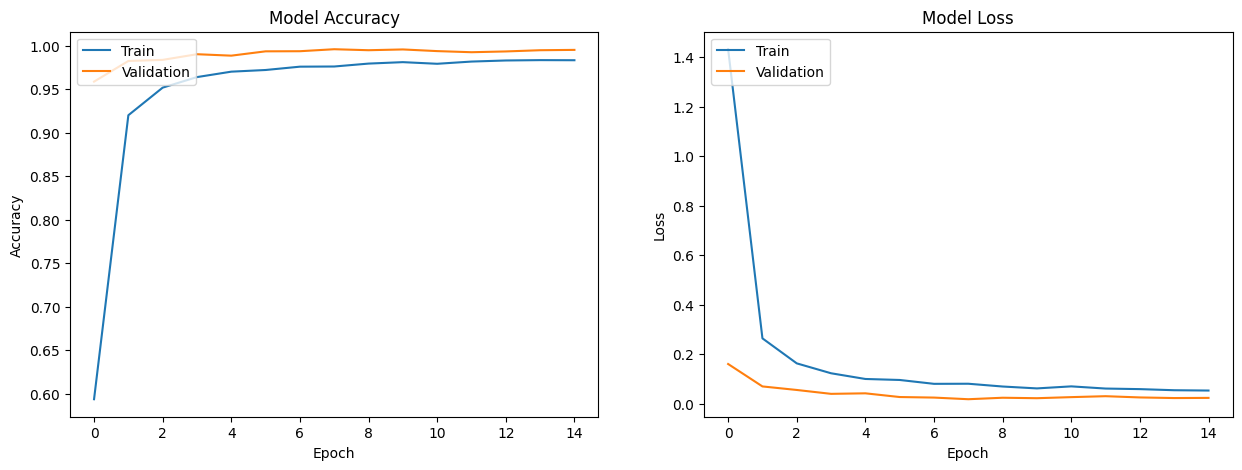

In [9]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()

## Plot model learning curve

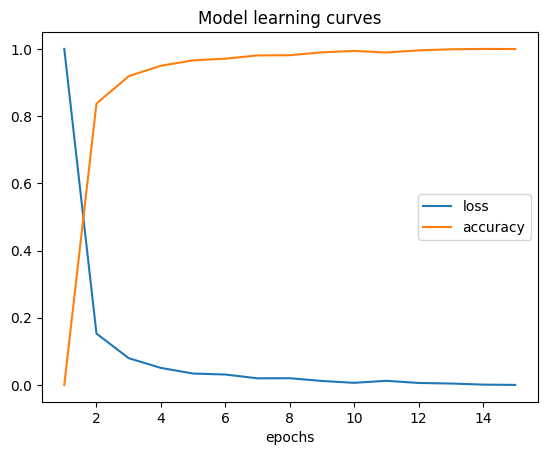

In [10]:
def minmax(a):
    a = np.asarray(a)
    a = (a - a.min()) / (a.max() - a.min())
    return a

plt.plot(range(1, epochs+1), minmax(history.history['loss']))
plt.plot(range(1, epochs+1), minmax(history.history['accuracy']))
plt.title('Model learning curves')
plt.xlabel('epochs')
plt.gca().legend(('loss', 'accuracy'))
plt.show()

## Evaluating the model with the test data

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1675
Test accuracy Model: 96.79%
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


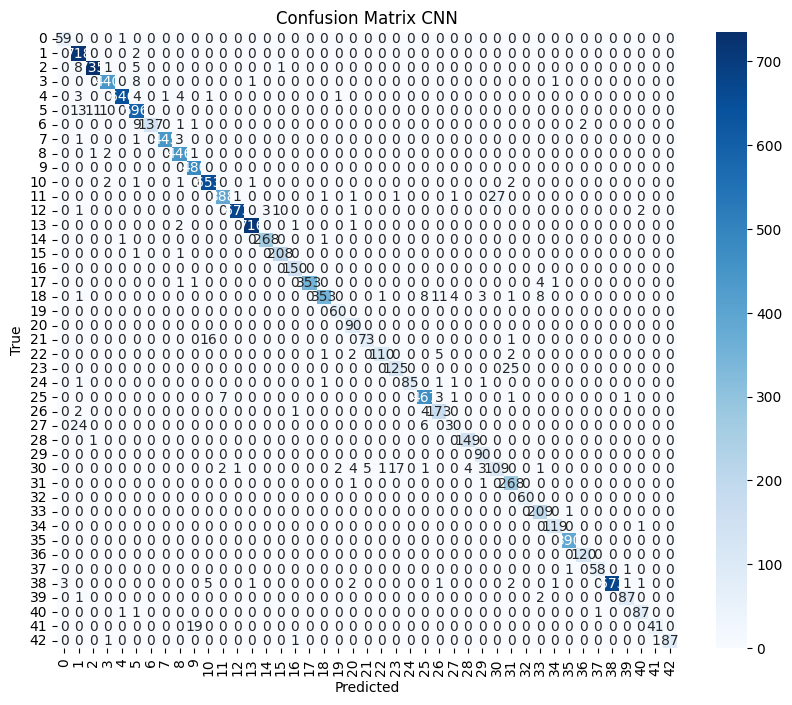

In [11]:
# Load the test dataset
y_test_df = pd.read_csv('Test.csv')

# Extract labels and paths
labels = y_test_df["ClassId"].values
imgs = y_test_df["Path"].values

# Preprocess images
data = []

# Retrieve the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open(img)
        image = image.resize([30, 30])
        data.append(np.array(image))

#Normieren der Daten
X_test = np.array(data).astype('float32')/255.0

# One-hot encode the labels
y_test_one_hot = tf.keras.utils.to_categorical(labels, num_classes=43)

# Evaluate model
#test_loss, test_accuracy_cnn = cnn.evaluate(X_test, y_test_one_hot)
test_loss, test_accuracy_model = model.evaluate(X_test, y_test_one_hot)
#print(f'Test accuracy CNN: {test_accuracy_cnn * 100:.2f}%')
print(f'Test accuracy Model: {test_accuracy_model * 100:.2f}%')

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = labels

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix CNN')
plt.show()




## Save the model

In [12]:
# Save the trained model
model.save('traffic_sign_cnn_model.keras')